# MULTICLASS CLASSIFICATION 



In [1]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print("shape of \nX_train is:",X_train.shape,"\nY_train is:",Y_train.shape,"\nX_test is:",X_test.shape,"\nY_test is:",Y_test.shape)

shape of 
X_train is: (8000, 28, 28) 
Y_train is: (8000,) 
X_test is: (2000, 28, 28) 
Y_test is: (2000,)


In [4]:
#print the unique values in Y_train
print("the unique values are:",np.unique(Y_train))


the unique values are: [0 1 2 3 4 5 6 7 8 9]


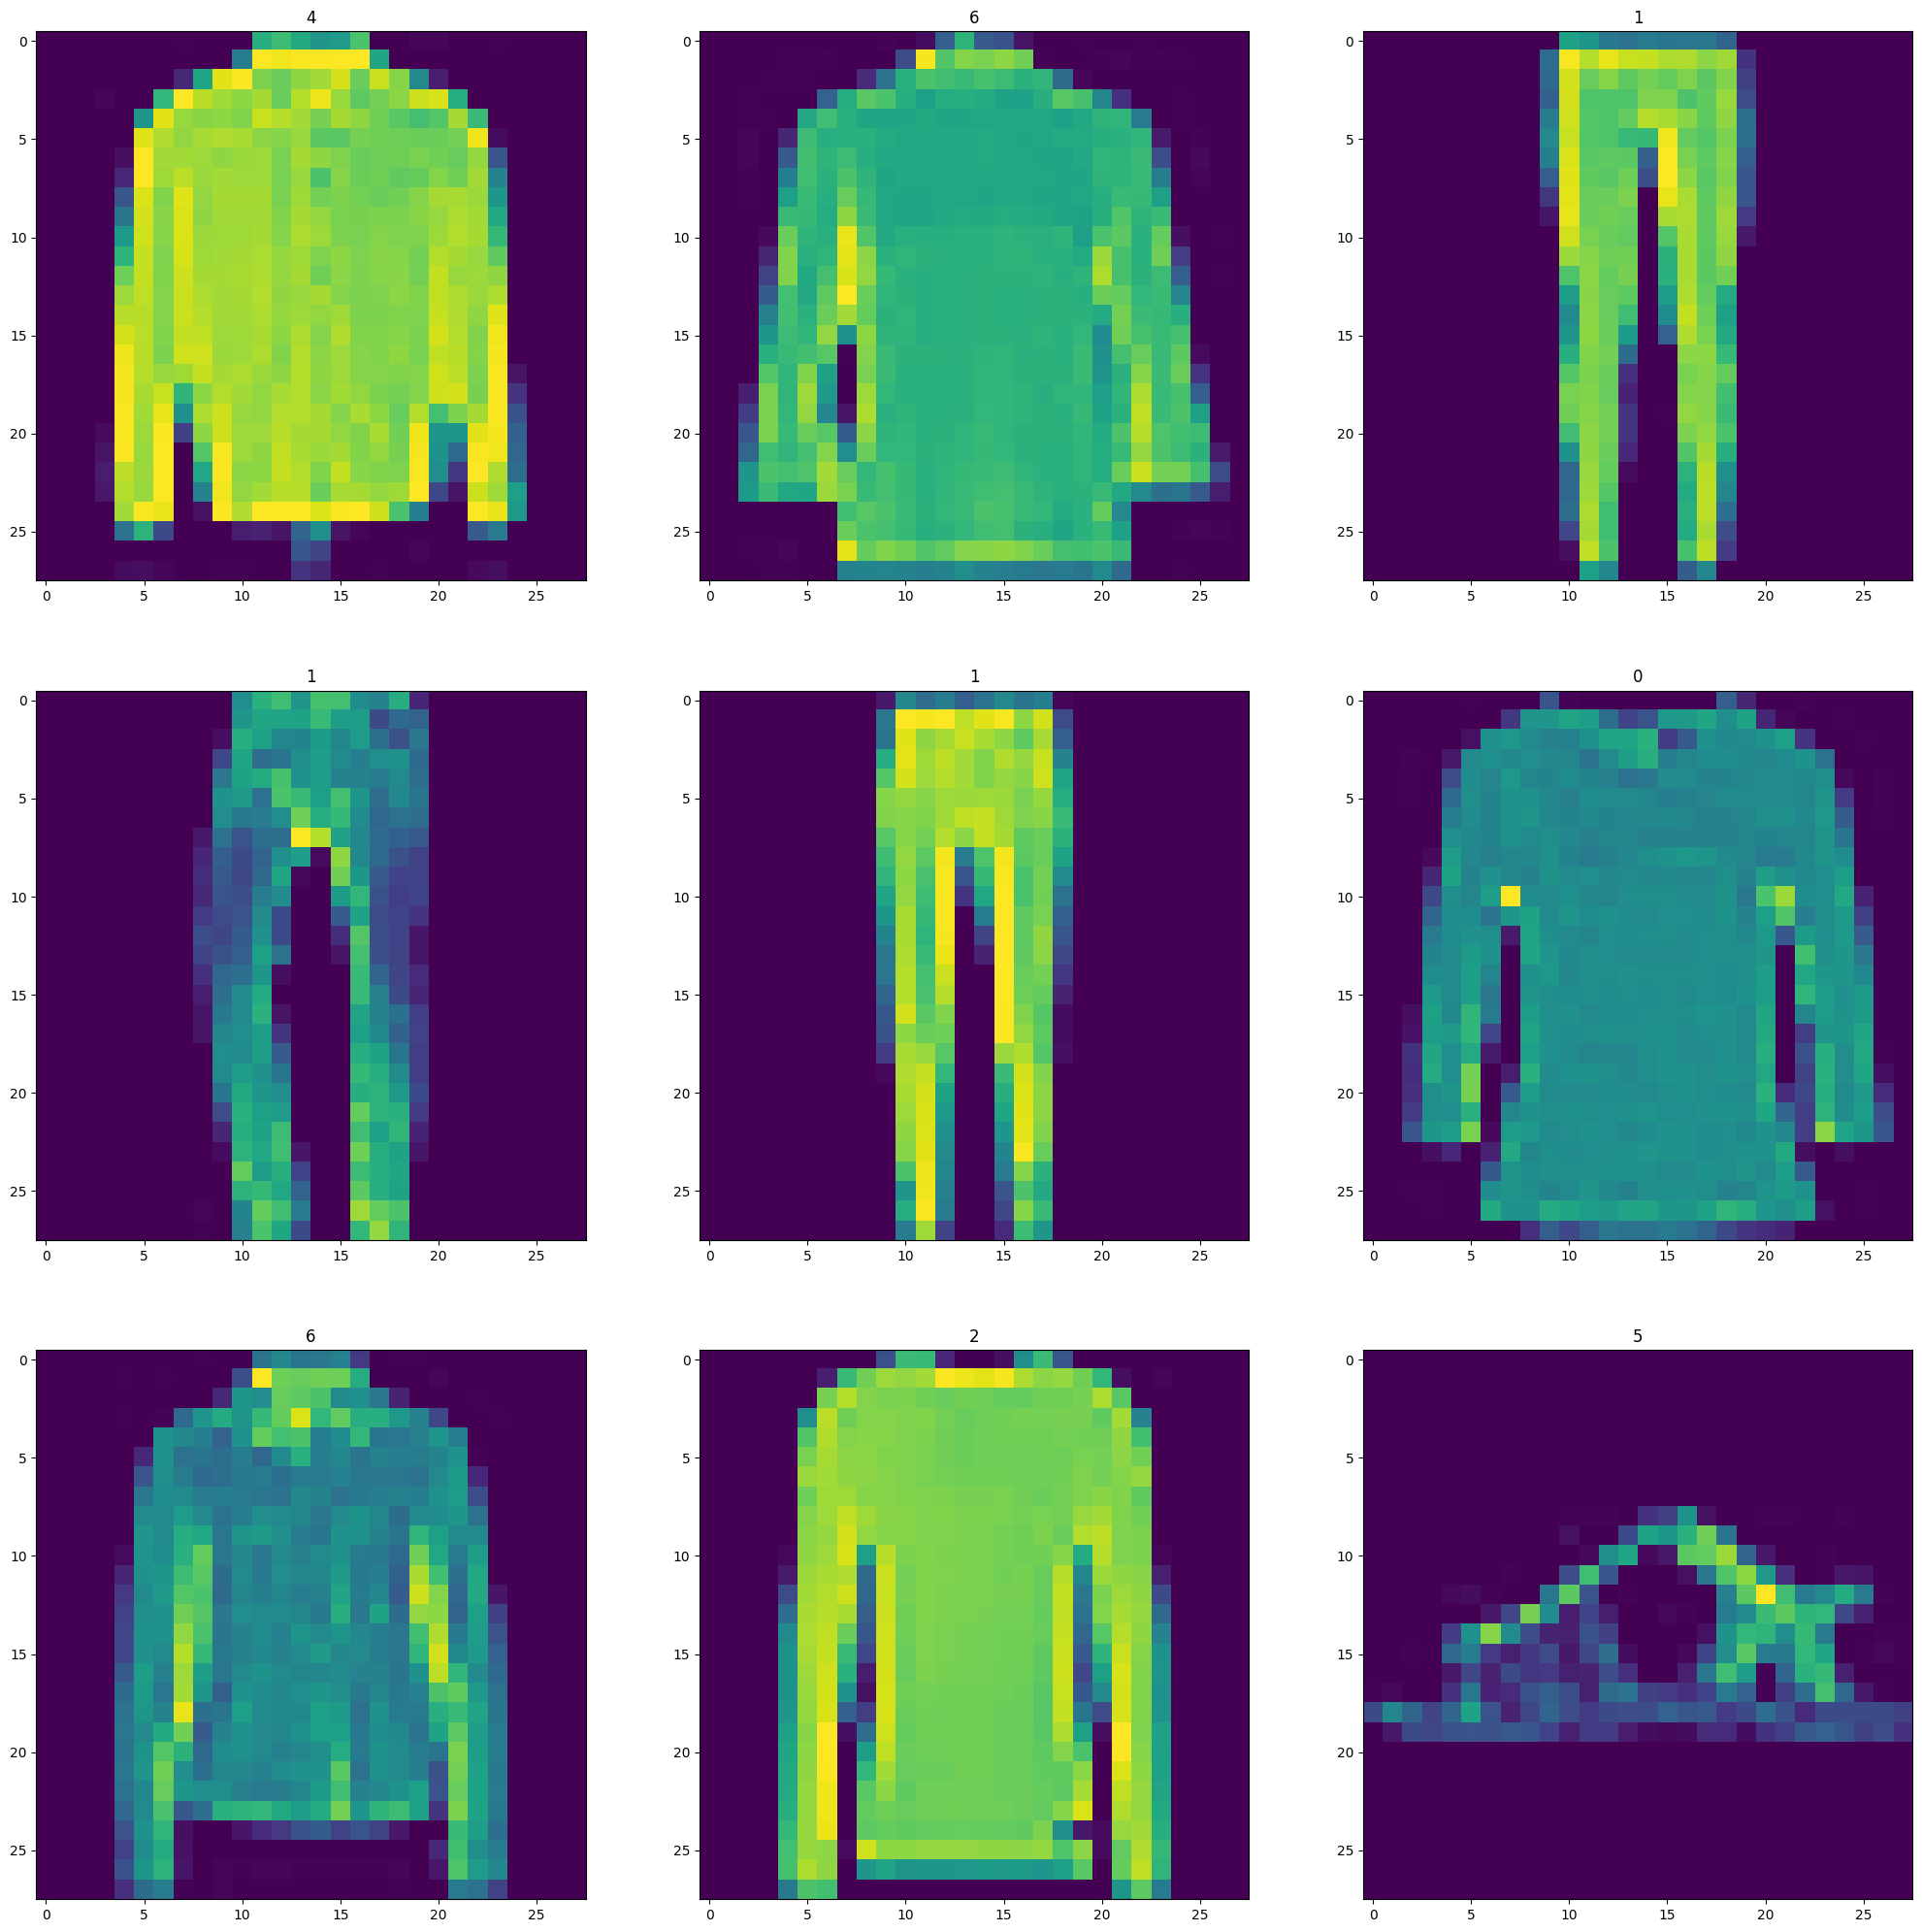

In [5]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index]) #edit1__plot_image_here_
  plt.title(Y_train[index]) #edit2__add_label_here_
  plt.show
  
  


###These number denotes the respective object
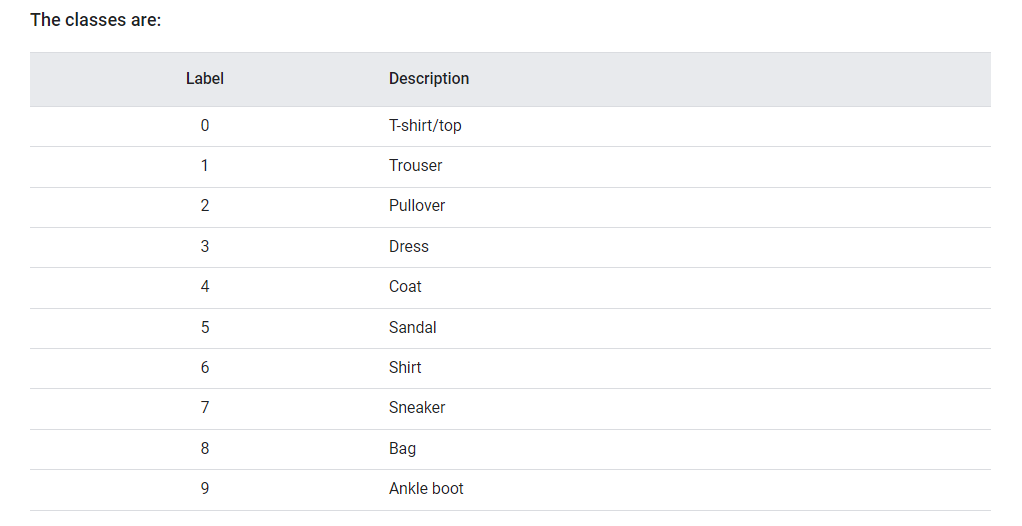

In [6]:
# Find the count of each type of class
import pandas as pd
count = pd.Series(Y_train).value_counts()
print(count)

6    820
3    810
4    810
1    809
9    807
5    804
7    798
8    789
0    778
2    775
dtype: int64


In [7]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])       

In [9]:
#Lets analyse the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [10]:
""" 
[objective] Write the answer here: Trainable params = 111,146
"""

' \n[objective] Write the answer here: Trainable params = 111,146\n'

In [11]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 2s 7ms/step - loss: 6.2350 - accuracy: 0.5406 - val_loss: 1.2909 - val_accuracy: 0.5994
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.9621 - accuracy: 0.6808 - val_loss: 1.0962 - val_accuracy: 0.6525
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8202 - accuracy: 0.7080 - val_loss: 0.9126 - val_accuracy: 0.7212
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7255 - accuracy: 0.7431 - val_loss: 0.8799 - val_accuracy: 0.7175
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6666 - accuracy: 0.7622 - val_loss: 0.8464 - val_accuracy: 0.7269
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6175 - accuracy: 0.7758 - val_loss: 0.8948 - val_accuracy: 0.7281
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5918 - accuracy: 0.7842 - val_loss: 0.8066 - val_accuracy: 0.7481
Epoch 

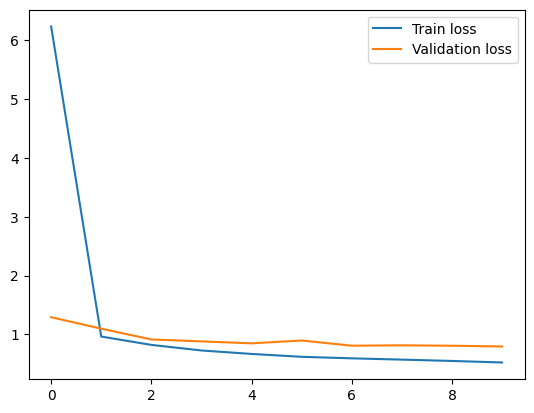

In [12]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [18]:
"""
[Under 100 words] Write your answer here: 
The graph shows that in initial stages the train loss is greater than the validation loss as the model is still learning.But later on the gap between two plots i.e train loss and validation loss increases which indiates overfitting.Overfitting refers to a phenomenon where a model becomes too complex and overly specialized to the training data, resulting in poor performance on new and unseen data.
So due to overfitting the validation loss is greater than the train loss here.
"""

'\n[Under 100 words] Write your answer here: \nThe graph shows that in initial stages the train loss is greater than the validation loss as the model is still learning.But later on the gap between two plots i.e train loss and validation loss increases which indiates overfitting.Overfitting refers to a phenomenon where a model becomes too complex and overly specialized to the training data, resulting in poor performance on new and unseen data.\nSo due to overfitting the validation loss is greater than the train loss here.\n'

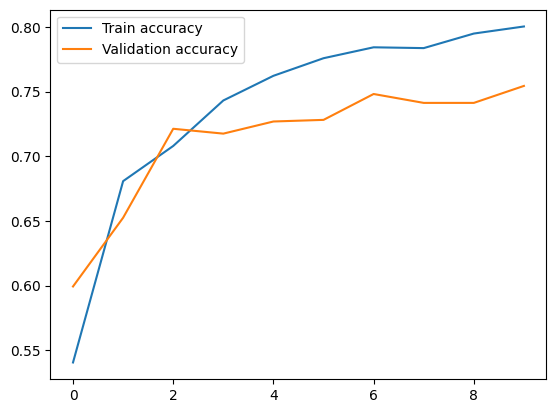

In [13]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [20]:
"""
[Under 100 words] Write your answer here:
It can be seen that firstly train accuracy and validation accuracy boty increases but later on validation accuracy increases with very slow rate i.e almost constant which indicates oveerfitting.
Due to overfitting the model may achieve high accuracy on the training data but performs poorly on the validation data or any other data it hasn't encountered before.
To handle with the situation we should simplify the model i.e we have to reduce model comlexity to imrove its generalisation capabilities. 

"""

"\n[Under 100 words] Write your answer here:\nIt can be seen that firstly train accuracy and validation accuracy boty increases but later on validation accuracy increases with very slow rate i.e almost constant which indicates oveerfitting.\nDue to overfitting the model may achieve high accuracy on the training data but performs poorly on the validation data or any other data it hasn't encountered before.\nTo handle with the situation we should simplify the model i.e we have to reduce model comlexity to imrove its generalisation capabilities. \n\n"

In [21]:
#Checking the prediction

Y_predicted = model.predict(X_test)
Y_pred = np.argmax(Y_predicted, axis = 1)

63/63 [==============================] - 0s 3ms/step


In [22]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
print("The r2_score is:")
r2_score(Y_test, Y_pred)


The r2_score is:


0.6903215891189919

In [23]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [24]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)

(128, 64)
(64, 32)
(32, 10)


In [25]:
# Does that satisfied the matrix multiplication math discussed earlier

Yes, it do satisfied the matrix multiplication math. The shape of kernel pxq indicates that the current layer has p neurons and each neuron has q weights associated with it. So as the matrix of 1xp activations from previous layer is multiplied with a kernel of shape pxq it will give a layer of 1xq outputs that are combined with bias to produce n activations for the output layer.